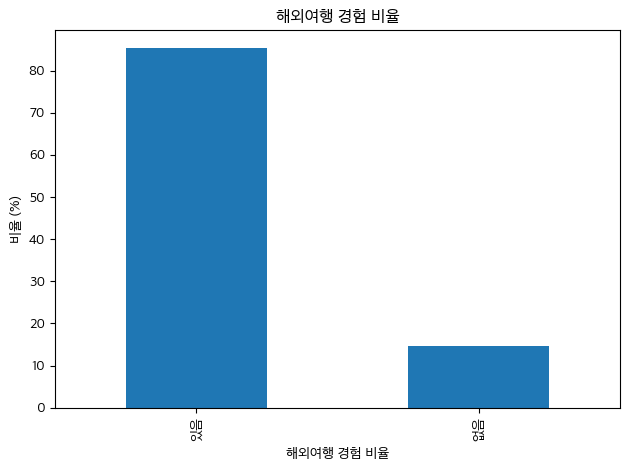

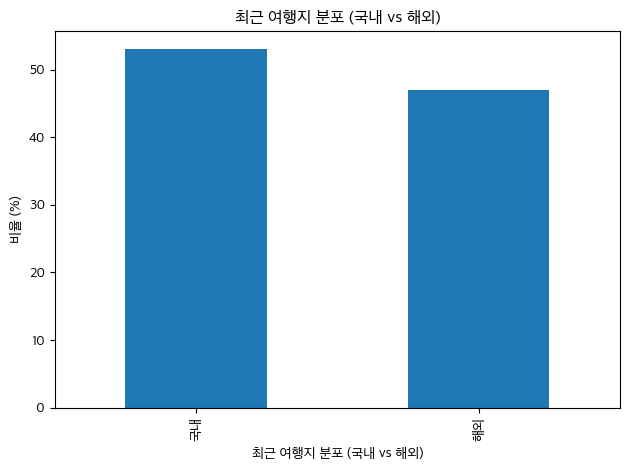

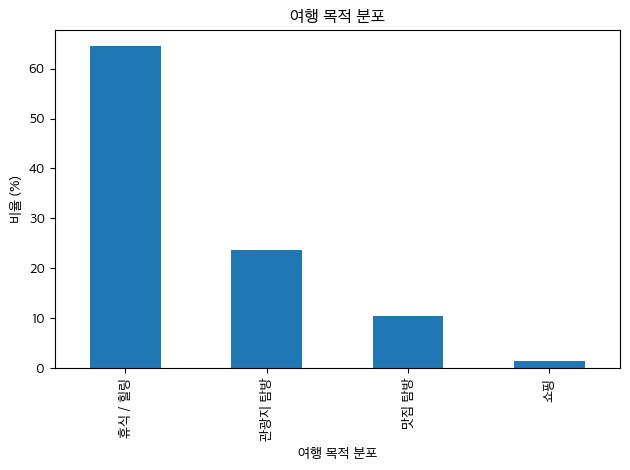

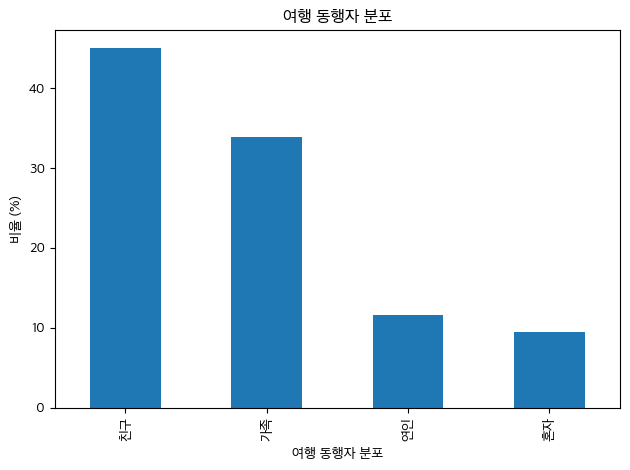

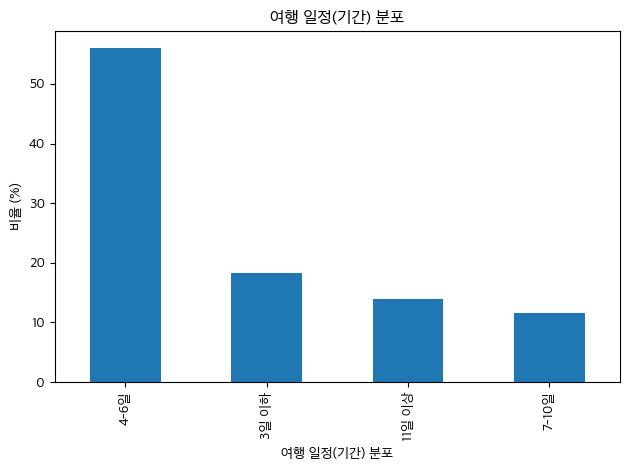

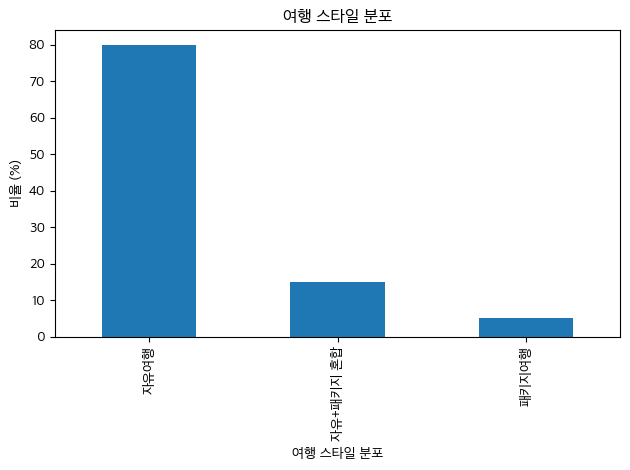

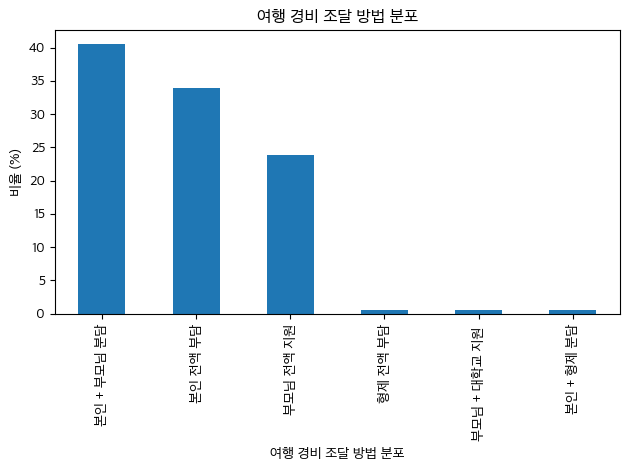

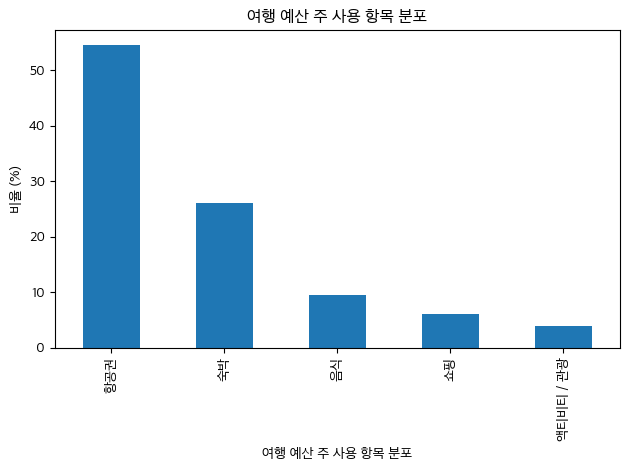

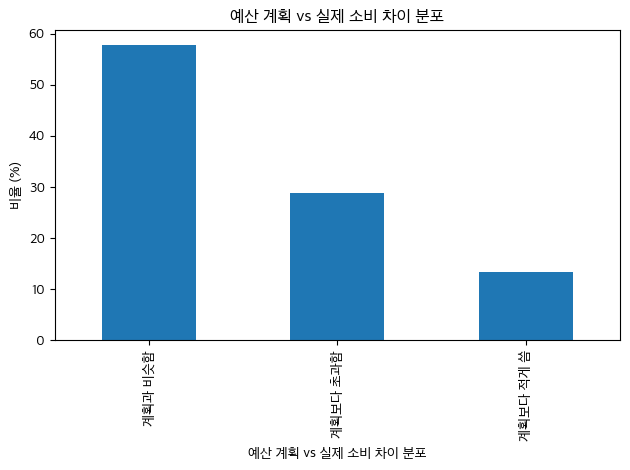

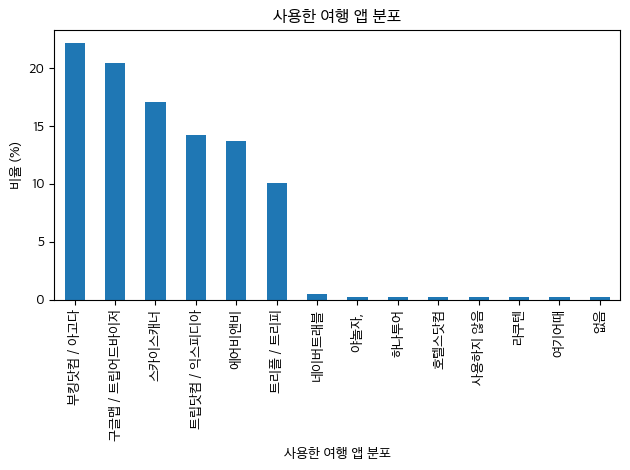

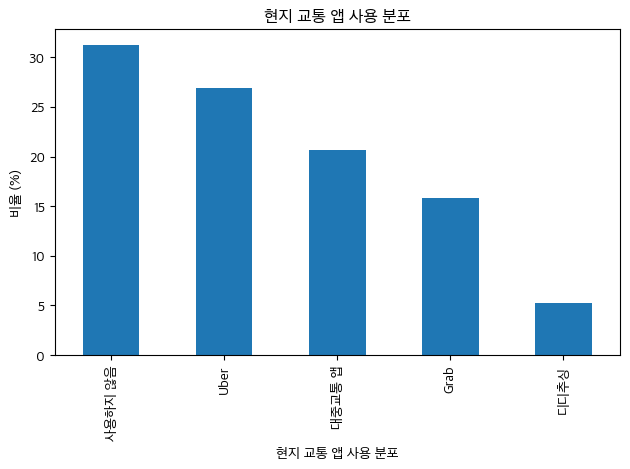

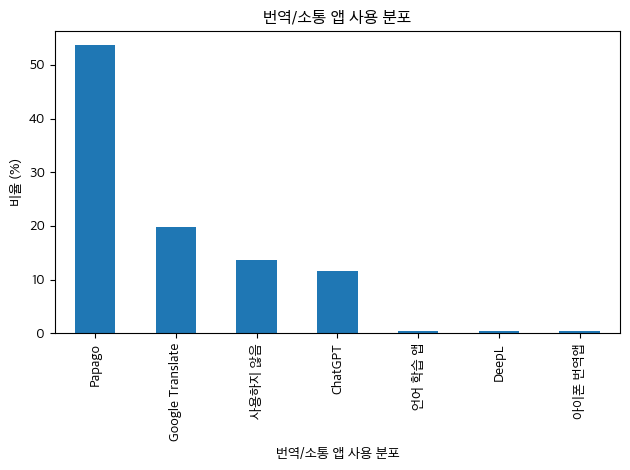

/var/folders/fd/p8gl394x5wjgxs6cdb2744br0000gn/T/ipykernel_42789/2386090771.py:59: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


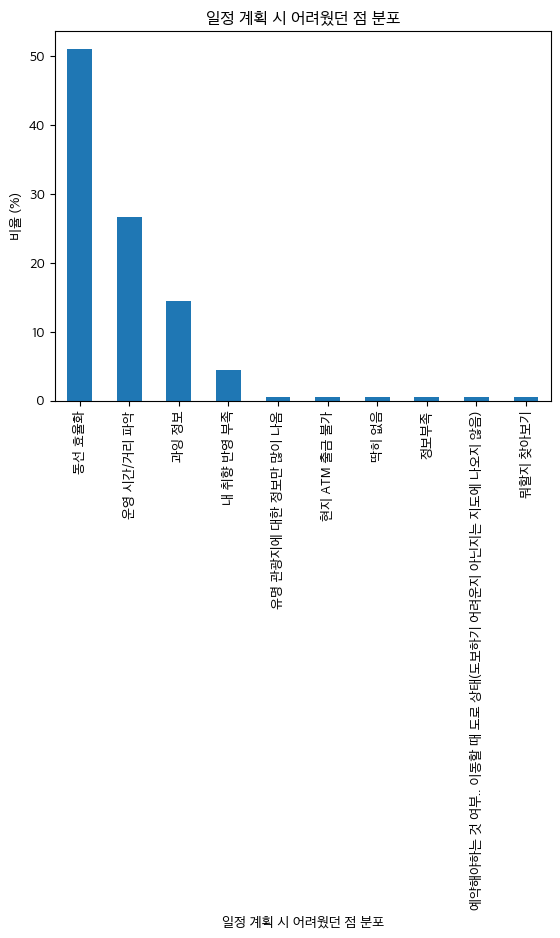

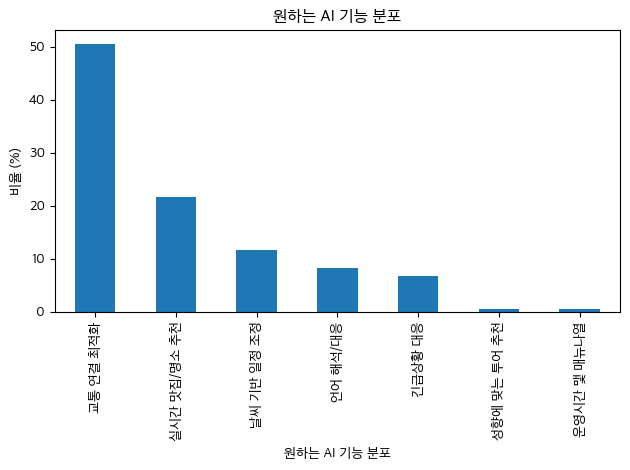

>>> 'reason_non_experience' 컬럼이 없습니다. 스킵합니다.


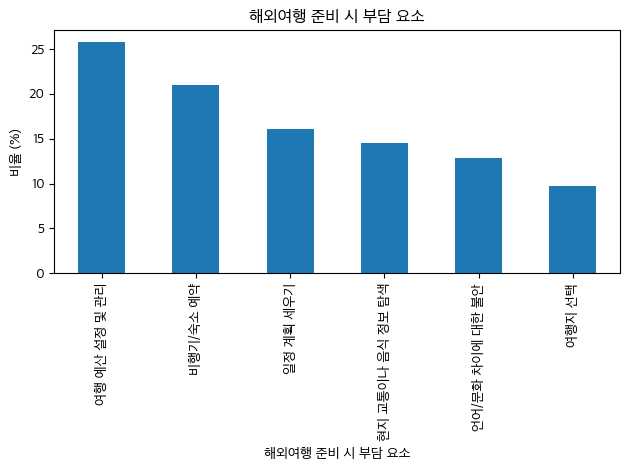

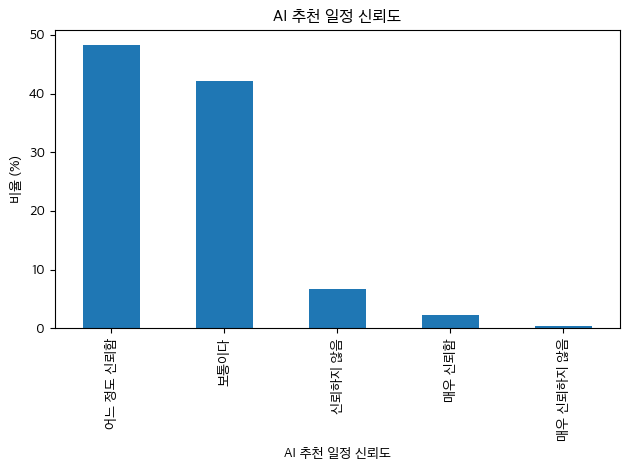

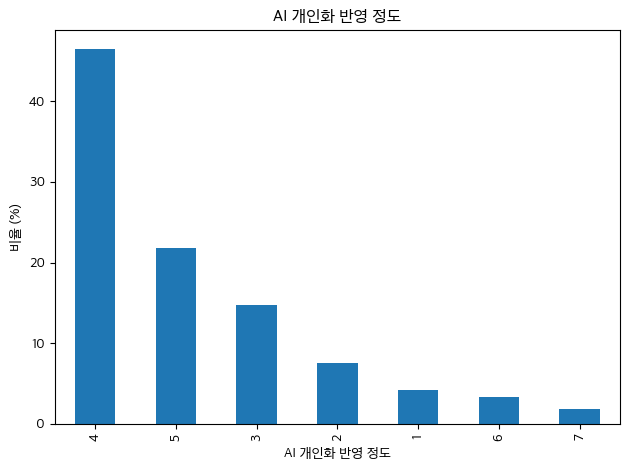

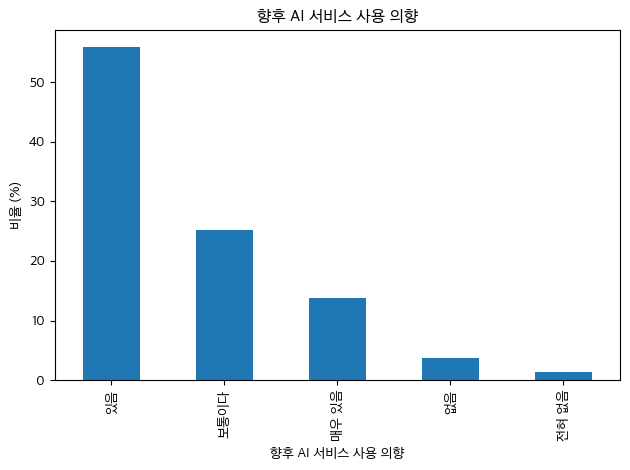

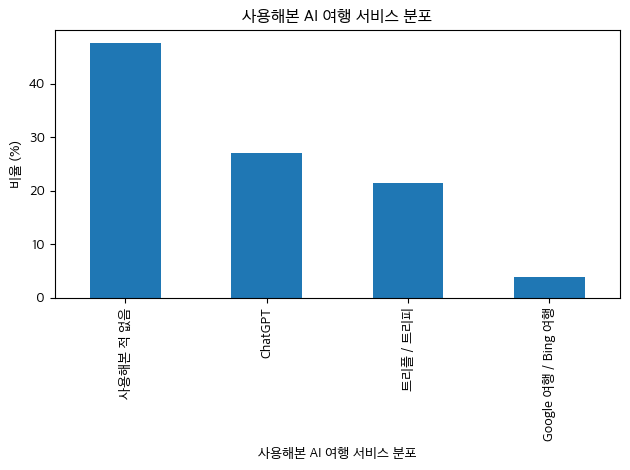

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
try:
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = font_manager.FontProperties(fname=font_path)
    rc('font', family=font_prop.get_name())
except:
    rc('font', family='Apple SD Gothic Neo')
rc('axes', unicode_minus=False)

# 데이터 로드 및 컬럼명 간소화
df = pd.read_csv('/Users/parkchangyu/Githubrepo/Insight_Report_Maker/[4월 TrendZ] MZ세대의 여행 트렌드 및 AI 추천 서비스 경험 설문조사.csv')
rename_map = {
    '1-5. 해외여행 경험이 있나요?': 'experience',
    '1-3. 최근 여행지 장소는 어디였나요?': 'recent_location',
    '1-4. 최근 여행의 주요 목적은 무엇이었나요?': 'purpose',
    '2-1. 누구와 함께 여행을 다녀오셨나요?': 'companion',
    '2-2. 여행 일정은 며칠 이었나요?': 'duration',
    '2-3. 여행 스타일은 어떤 유형에 가까웠나요?': 'style',
    '2-6. 여행 경비는 어떻게 마련하셨나요?': 'budget_source',
    '3-1. 여행 중 가장 많은 예산이 투입된 항목은 무엇이었나요?': 'budget_item',
    '3-2. 계획한 예산과 실제 소비 금액의 차이는 어땠나요?': 'budget_diff',
    '4-1. 사용한 여행 앱은? (복수 선택 가능)': 'app_used',
    '4-2. 현지 교통 앱을 사용했다면? (복수 선택 가능)': 'local_transport_app',
    '4-3. 번역 또는 소통 관련 앱 사용 경험 (복수 선택 가능)': 'translation_app',
    '5-2. 일정 계획 시 어려웠던 점은?': 'itinerary_difficulty',
    '5-3. 여행 중 이런 AI 기능이 있었다면 좋았을까요?': 'desired_ai_features',
    '6-1. 해외여행을 지금까지 한 번도 가지 않은 가장 큰 이유는 무엇인가요?': 'reason_non_experience',
    '6-3. 해외여행을 만약 준비한다면 가장 복잡하거나 부담스럽게 느껴지는 부분은 무엇인가요? (복수 선택 가능)': 'non_experience_complexity',
    '7-1. AI가 추천하는 여행 일정을 신뢰하시나요?': 'trust_ai_itinerary',
    '7-2. 사용해본 AI 여행 서비스가 있다면? (복수 선택 가능)': 'ai_service',
    '7-3. AI가 나의 취향/예산/스타일을 얼마나 반영했나요?': 'ai_personalization',
    '7-4. 향후 AI 기반 여행 서비스를 사용할 의향이 있으신가요?': 'future_ai_intent',
}
df = df.rename(columns=rename_map)

# 헬퍼 함수
def plot_single(col, title):
    counts = df[col].value_counts(normalize=True) * 100
    plt.figure()
    counts.plot(kind='bar')
    plt.title(title)
    plt.ylabel('비율 (%)')
    plt.xlabel(title)
    plt.tight_layout()
    plt.show()

def plot_multi(col, title):
    s = df[col].dropna().str.split(';').explode()
    counts = s.value_counts(normalize=True) * 100
    plt.figure()
    counts.plot(kind='bar')
    plt.title(title)
    plt.ylabel('비율 (%)')
    plt.xlabel(title)
    plt.tight_layout()
    plt.show()

# 시각화 리스트
visuals = [
    ('experience', '해외여행 경험 비율', plot_single),
    ('recent_location', '최근 여행지 분포 (국내 vs 해외)', plot_single),
    ('purpose', '여행 목적 분포', plot_multi),
    ('companion', '여행 동행자 분포', plot_multi),
    ('duration', '여행 일정(기간) 분포', plot_multi),
    ('style', '여행 스타일 분포', plot_multi),
    ('budget_source', '여행 경비 조달 방법 분포', plot_multi),
    ('budget_item', '여행 예산 주 사용 항목 분포', plot_multi),
    ('budget_diff', '예산 계획 vs 실제 소비 차이 분포', plot_single),
    ('app_used', '사용한 여행 앱 분포', plot_multi),
    ('local_transport_app', '현지 교통 앱 사용 분포', plot_multi),
    ('translation_app', '번역/소통 앱 사용 분포', plot_multi),
    ('itinerary_difficulty', '일정 계획 시 어려웠던 점 분포', plot_multi),
    ('desired_ai_features', '원하는 AI 기능 분포', plot_multi),
    ('reason_non_experience', '해외여행 미경험 주요 이유', plot_single),
    ('non_experience_complexity', '해외여행 준비 시 부담 요소', plot_multi),
    ('trust_ai_itinerary', 'AI 추천 일정 신뢰도', plot_single),
    ('ai_personalization', 'AI 개인화 반영 정도', plot_single),
    ('future_ai_intent', '향후 AI 서비스 사용 의향', plot_single),
    ('ai_service', '사용해본 AI 여행 서비스 분포', plot_multi),
]

# 실행
for col, title, fn in visuals:
    if col in df.columns:
        fn(col, title)
    else:
        print(f">>> '{col}' 컬럼이 없습니다. 스킵합니다.")

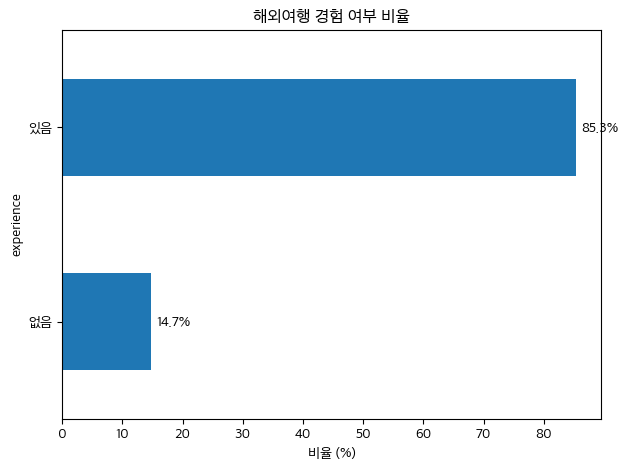

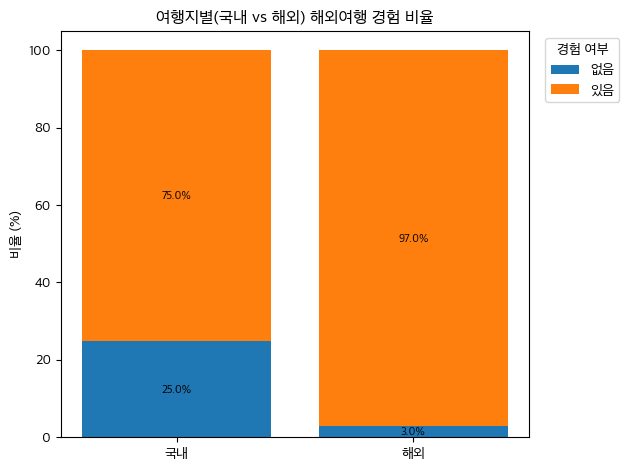

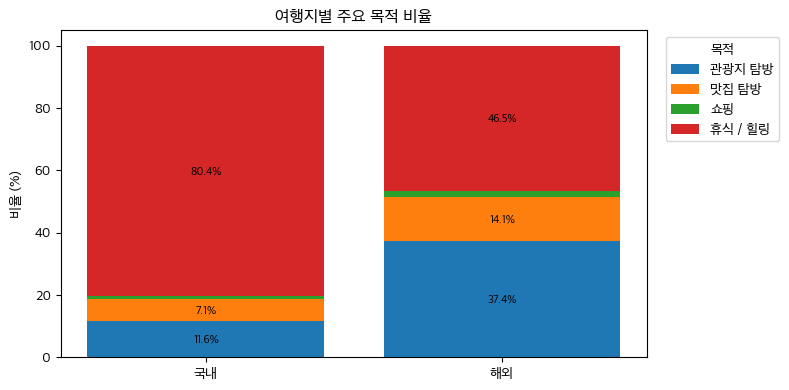

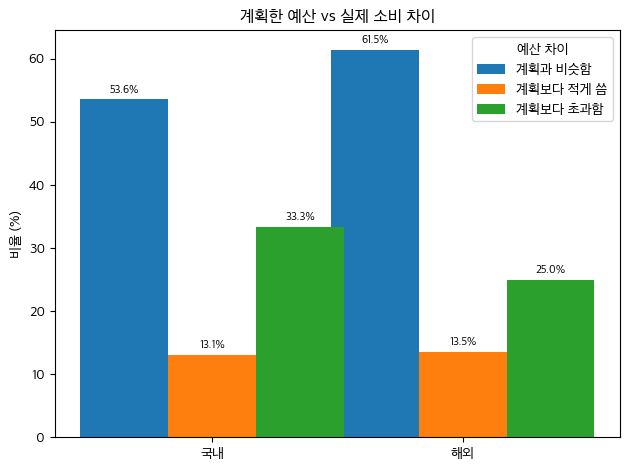

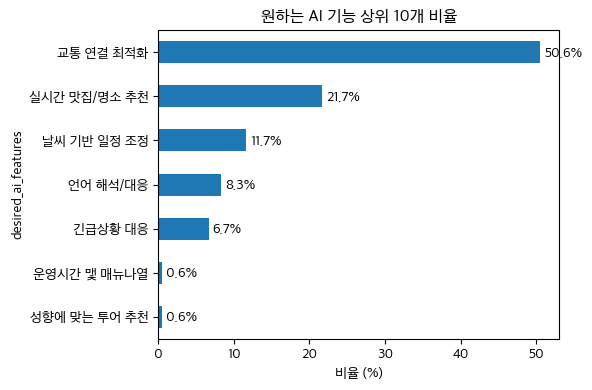

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# ——————————————————————————————————————————
# 0. 한글 폰트 설정 (환경에 맞게 조정)
try:
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = font_manager.FontProperties(fname=font_path)
    rc('font', family=font_prop.get_name())
except:
    rc('font', family='Apple SD Gothic Neo')
rc('axes', unicode_minus=False)

# 1. 데이터 로드 및 컬럼명 간소화
df = pd.read_csv('/Users/parkchangyu/Githubrepo/Insight_Report_Maker/[4월 TrendZ] MZ세대의 여행 트렌드 및 AI 추천 서비스 경험 설문조사.csv')
df = df.rename(columns={
    '1-5. 해외여행 경험이 있나요?': 'experience',
    '1-3. 최근 여행지 장소는 어디였나요?': 'recent_location',
    '1-4. 최근 여행의 주요 목적은 무엇이었나요?': 'purpose',
    '2-6. 여행 경비는 어떻게 마련하셨나요?': 'budget_source',
    '3-2. 계획한 예산과 실제 소비 금액의 차이는 어땠나요?': 'budget_diff',
    '5-3. 여행 중 이런 AI 기능이 있었다면 좋았을까요?': 'desired_ai_features',
})

# 2. 바 차트에 값 표시용 헬퍼
def annotate_hbar(ax, fmt="{:.1f}%"):
    for patch in ax.patches:
        w = patch.get_width()
        ax.text(w + ax.get_xlim()[1]*0.01, patch.get_y() + patch.get_height()/2,
                fmt.format(w), va='center')

# ——————————————————————————————————————————
# 3. (A) 해외여행 경험 비율
exp_ct = df['experience'].value_counts(normalize=True) * 100
exp_ct = exp_ct.sort_values()
fig, ax = plt.subplots()
exp_ct.plot(kind='barh', ax=ax)
annotate_hbar(ax)
ax.set_title('해외여행 경험 여부 비율')
ax.set_xlabel('비율 (%)')
plt.tight_layout()
plt.show()

# 4. (B) 국내 vs 해외별 해외여행 경험 비율 (스택형)
cross = pd.crosstab(df['recent_location'], df['experience'], normalize='index') * 100
fig, ax = plt.subplots()
bottom = np.zeros(len(cross))
for col in cross.columns:
    ax.bar(cross.index, cross[col], bottom=bottom, label=col)
    # 각 영역에 퍼센트 레이블
    for i, val in enumerate(cross[col]):
        if val > 3:
            ax.text(i, bottom[i] + val/2, f"{val:.1f}%", ha='center', va='center', fontsize=8)
    bottom += cross[col].values
ax.set_title('여행지별(국내 vs 해외) 해외여행 경험 비율')
ax.set_ylabel('비율 (%)')
ax.legend(title='경험 여부', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

# 5. (C) 여행지별 주요 목적 분포 (스택형)
purp = pd.crosstab(df['recent_location'], df['purpose'], normalize='index') * 100
fig, ax = plt.subplots(figsize=(8, 4))
bottom = np.zeros(len(purp))
for col in purp.columns:
    ax.bar(purp.index, purp[col], bottom=bottom, label=col)
    for i, val in enumerate(purp[col]):
        if val > 5:
            ax.text(i, bottom[i] + val/2, f"{val:.1f}%", ha='center', va='center', fontsize=8)
    bottom += purp[col].values
ax.set_title('여행지별 주요 목적 비율')
ax.set_ylabel('비율 (%)')
ax.legend(title='목적', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

# 6. (D) 계획 vs 실제 소비 금액 차이 분포 (그룹형)
bd_ct = pd.crosstab(df['recent_location'], df['budget_diff'], normalize='index') * 100
idx = np.arange(len(bd_ct))
width = 0.35
fig, ax = plt.subplots()
for i, col in enumerate(bd_ct.columns):
    ax.bar(idx + i*width, bd_ct[col], width, label=col)
    for j, val in enumerate(bd_ct[col]):
        ax.text(j + i*width, val + 1, f"{val:.1f}%", ha='center', va='bottom', fontsize=8)
ax.set_xticks(idx + width*(len(bd_ct.columns)-1)/2)
ax.set_xticklabels(bd_ct.index)
ax.set_title('계획한 예산 vs 실제 소비 차이')
ax.set_ylabel('비율 (%)')
ax.legend(title='예산 차이')
plt.tight_layout()
plt.show()

# 7. (E) 원하는 AI 기능 분포 (상위 10개)
s = df['desired_ai_features'].dropna().str.split(';').explode()
ai_ct = s.value_counts(normalize=True)[:10] * 100
ai_ct = ai_ct.sort_values()
fig, ax = plt.subplots(figsize=(6, 4))
ai_ct.plot(kind='barh', ax=ax)
annotate_hbar(ax)
ax.set_title('원하는 AI 기능 상위 10개 비율')
ax.set_xlabel('비율 (%)')
plt.tight_layout()
plt.show()


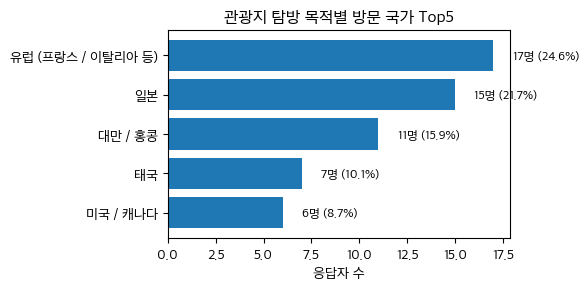

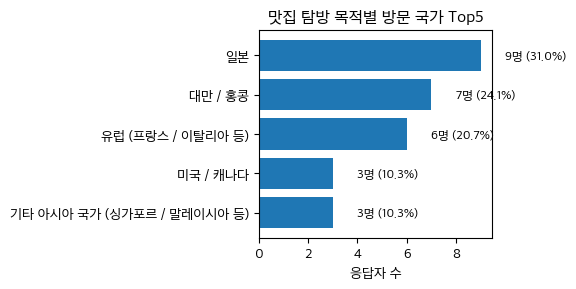

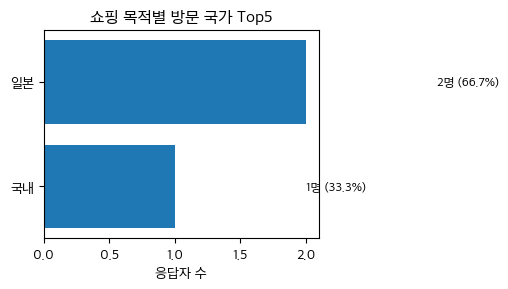

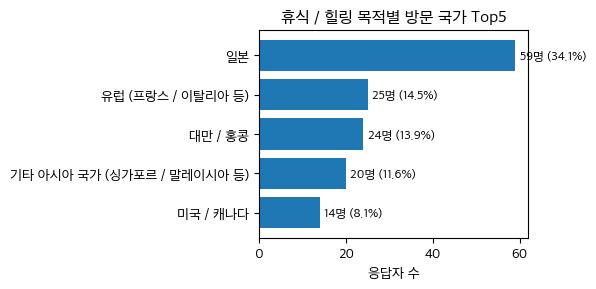

In [13]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 0. 한글 폰트 설정
try:
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    rc('font', family=font_manager.FontProperties(fname=font_path).get_name())
except:
    rc('font', family='Apple SD Gothic Neo')
rc('axes', unicode_minus=False)

# 1. CSV 파일 자동 탐색 및 로드
csv_file = '/Users/parkchangyu/Githubrepo/Insight_Report_Maker/[4월 TrendZ] MZ세대의 여행 트렌드 및 AI 추천 서비스 경험 설문조사.csv'
df = pd.read_csv(csv_file)

# 2. 칼럼명 간소화
df = df.rename(columns={
    '1-4. 최근 여행의 주요 목적은 무엇이었나요?': 'purpose',
    '2-5. 여행을 다녀온 국가는 어디인가요? (복수선택)': 'visited_countries'
})

# 3. 목적별 국가 Top5 집계
ec = df[['purpose', 'visited_countries']].dropna()
ec = ec.assign(country=ec['visited_countries'].str.split(';')).explode('country')
cnt = ec.groupby(['purpose', 'country']).size().rename('count').reset_index()
top5 = cnt.groupby('purpose').apply(lambda g: g.nlargest(5, 'count')).reset_index(drop=True)
purpose_total = ec['purpose'].value_counts().to_dict()
top5['pct_within_purpose'] = top5.apply(lambda x: x['count'] / purpose_total[x['purpose']] * 100, axis=1)

# 4. 시각화: 목적별 상위 5개 국가
for purpose in top5['purpose'].unique():
    sub = top5[top5['purpose'] == purpose].sort_values('count')
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.barh(sub['country'], sub['count'])
    for i, (cnt, pct) in enumerate(zip(sub['count'], sub['pct_within_purpose'])):
        ax.text(cnt + 1, i, f"{cnt}명 ({pct:.1f}%)", va='center', fontsize=9)
    ax.set_title(f"{purpose} 목적별 방문 국가 Top5")
    ax.set_xlabel('응답자 수')
    plt.tight_layout()
    plt.show()


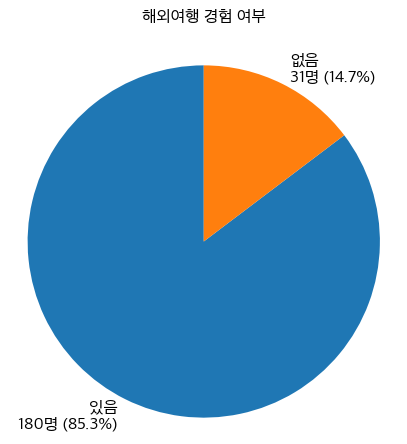

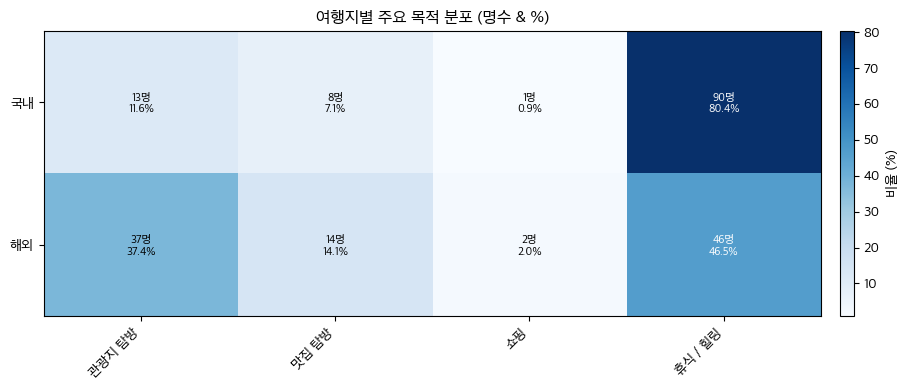

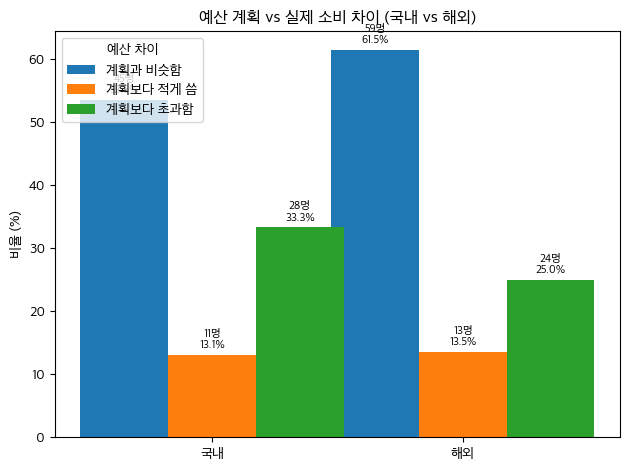

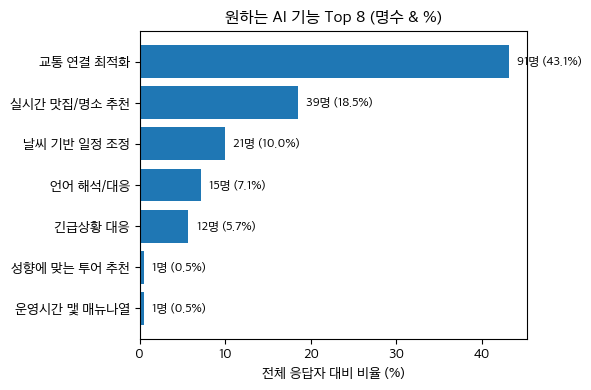

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 0. 한글 폰트 설정 (환경에 맞게 조정)
try:
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    rc('font', family=font_manager.FontProperties(fname=font_path).get_name())
except:
    rc('font', family='Apple SD Gothic Neo')
rc('axes', unicode_minus=False)

# 1. 데이터 로드 및 칼럼명 간소화
file_path = '/Users/parkchangyu/Githubrepo/Insight_Report_Maker/[4월 TrendZ] MZ세대의 여행 트렌드 및 AI 추천 서비스 경험 설문조사.csv'
df = pd.read_csv(file_path)
df = df.rename(columns={
    '1-5. 해외여행 경험이 있나요?': 'experience',
    '1-3. 최근 여행지 장소는 어디였나요?': 'recent_location',
    '1-4. 최근 여행의 주요 목적은 무엇이었나요?': 'purpose',
    '3-2. 계획한 예산과 실제 소비 금액의 차이는 어땠나요?': 'budget_diff',
    '5-3. 여행 중 이런 AI 기능이 있었다면 좋았을까요?': 'desired_ai_features',
})

# 2. A-D 차트에 사용할 공통 데이터 계산
# A. 해외여행 경험
exp_counts = df['experience'].value_counts()
exp_pct    = df['experience'].value_counts(normalize=True) * 100

# B. 여행지별 목적 교차분석
purp_cnt = pd.crosstab(df['recent_location'], df['purpose'])
purp_pct = purp_cnt.div(purp_cnt.sum(axis=1), axis=0) * 100

# C. 여행지별 예산 계획 vs 실제 소비
bd_cnt = pd.crosstab(df['recent_location'], df['budget_diff'])
bd_pct = bd_cnt.div(bd_cnt.sum(axis=1), axis=0) * 100

# D. 원하는 AI 기능 Top8
ai_s     = df['desired_ai_features'].dropna().str.split(';').explode()
ai_cnt   = ai_s.value_counts().iloc[:8]
ai_pct   = ai_cnt / len(df) * 100  # 전체 응답자 대비

# ——————————————————————————————————————————
# A. 파이 차트: 해외여행 경험
labels = [f"{idx}\n{exp_counts[idx]}명 ({exp_pct[idx]:.1f}%)"
          for idx in exp_counts.index]
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(exp_counts.values, labels=labels, startangle=90, textprops={'fontsize':12})
ax.set_title('해외여행 경험 여부', pad=20)
ax.axis('equal')
plt.show()

# ——————————————————————————————————————————
# B. 히트맵: 국내 vs 해외별 주요 목적
fig, ax = plt.subplots(figsize=(10,4))
cax = ax.imshow(purp_pct.values, aspect='auto', cmap='Blues')
# 축과 레이블
ax.set_xticks(np.arange(len(purp_pct.columns))); ax.set_xticklabels(purp_pct.columns, rotation=45, ha='right')
ax.set_yticks(np.arange(len(purp_pct.index))); ax.set_yticklabels(purp_pct.index)
# 셀마다 “count명\npercent%” 표시
for i in range(purp_pct.shape[0]):
    for j in range(purp_pct.shape[1]):
        cnt = purp_cnt.iat[i,j]
        pct = purp_pct.iat[i,j]
        if cnt>0:
            txt = f"{cnt}명\n{pct:.1f}%"
            color = 'white' if pct > purp_pct.values.max()/2 else 'black'
            ax.text(j, i, txt, ha='center', va='center', color=color, fontsize=8)
fig.colorbar(cax, label='비율 (%)', orientation='vertical', pad=0.02)
ax.set_title('여행지별 주요 목적 분포 (명수 & %)')
plt.tight_layout()
plt.show()

# ——————————————————————————————————————————
# C. 그룹형 막대: 국내 vs 해외 예산 계획 vs 실제 소비
labels = bd_pct.index
x = np.arange(len(labels)); width=0.35
fig, ax = plt.subplots()
for k, col in enumerate(bd_pct.columns):
    ax.bar(x + k*width, bd_pct[col], width, label=col)
    # 레이블
    for i, pct in enumerate(bd_pct[col]):
        cnt = bd_cnt.iloc[i,k]
        ax.text(i + k*width, pct + 1, f"{cnt}명\n{pct:.1f}%", ha='center', va='bottom', fontsize=8)
ax.set_xticks(x + width*(len(bd_pct.columns)-1)/2)
ax.set_xticklabels(labels)
ax.set_title('예산 계획 vs 실제 소비 차이 (국내 vs 해외)')
ax.set_ylabel('비율 (%)')
ax.legend(title='예산 차이', loc='upper left')
plt.tight_layout()
plt.show()

# ——————————————————————————————————————————
# D. 수평 막대: 원하는 AI 기능 Top8
fig, ax = plt.subplots(figsize=(6,4))
ax.barh(ai_cnt.index[::-1], ai_pct.values[::-1])
for i, (cnt, pct) in enumerate(zip(ai_cnt.values[::-1], ai_pct.values[::-1])):
    ax.text(pct + 1, i, f"{cnt}명 ({pct:.1f}%)", va='center', fontsize=9)
ax.set_title('원하는 AI 기능 Top 8 (명수 & %)')
ax.set_xlabel('전체 응답자 대비 비율 (%)')
plt.tight_layout()
plt.show()
